In [ ]:
import scanpy as sc

In [2]:
adata=sc.read("data/adata_tree.h5ad")

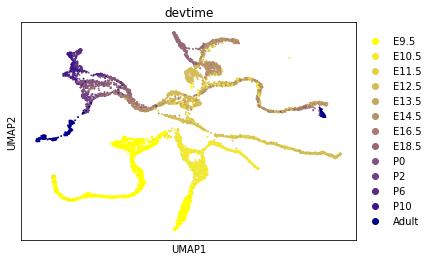

In [3]:
sc.pl.umap(adata,color="devtime")

In [4]:
import numpy as np

In [5]:
import scFates as scf

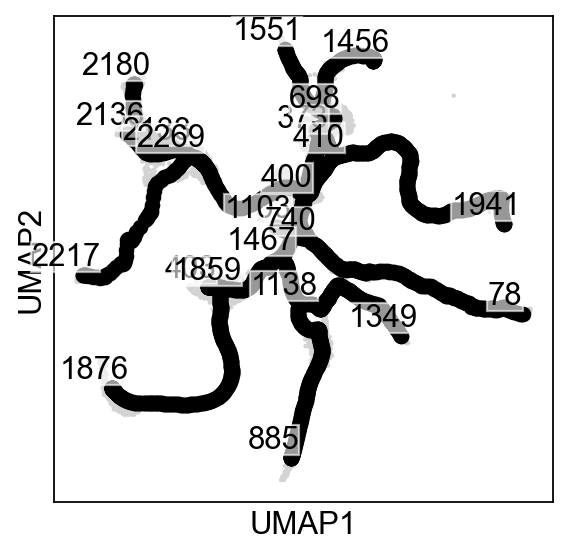

In [6]:
sc.set_figure_params()
scf.pl.graph(adata)

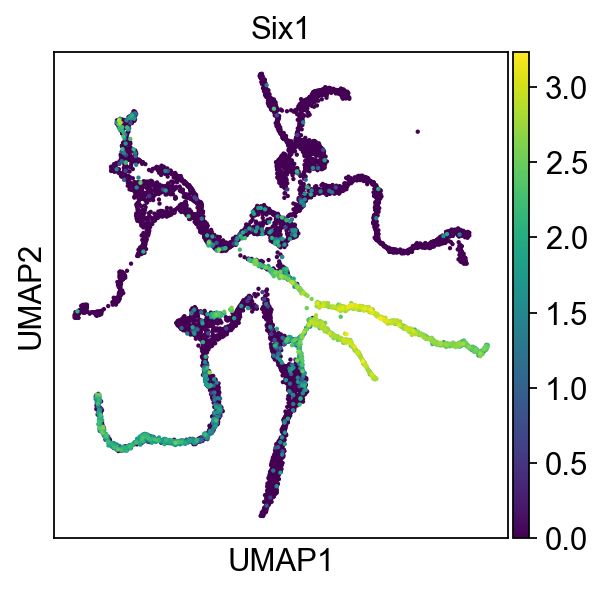

In [7]:
sc.pl.umap(adata,color="Six1")

In [ ]:
scf.tl.test_association(adata,n_jobs=40,root="NCC2",leaves=["nmSC<>mSC"])
adata.var.to_csv("data/stat_assoc_NCC->nmSC<>mSC.csv")

In [8]:
adata_scenic=sc.read("data/adata_scenic.h5ad")

In [9]:
adata_scenic=adata_scenic[adata.obs_names]
adata_scenic.uns=adata.uns
adata_scenic.obsm=adata.obsm
adata_scenic.obs=adata.obs

In [10]:
adata=adata_scenic

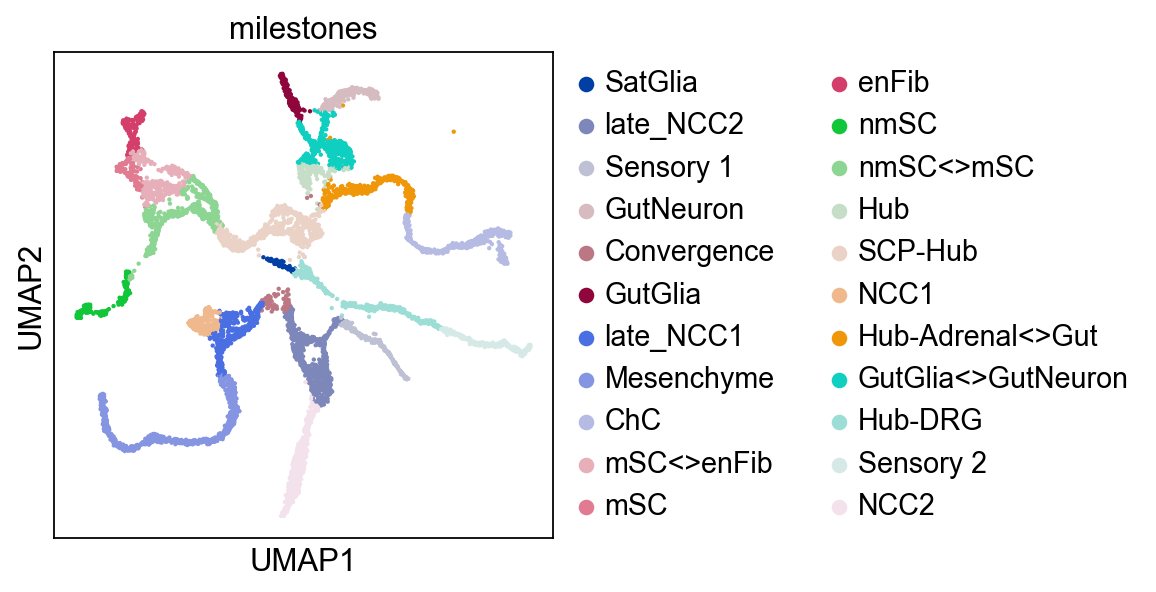

In [11]:
sc.pl.umap(adata,color="milestones")

In [12]:
scf.tl.subset_tree(adata,root_milestone="NCC2",milestones=["nmSC<>mSC","SatGlia","Sensory 2"])

subsetting tree
node 366 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:03) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


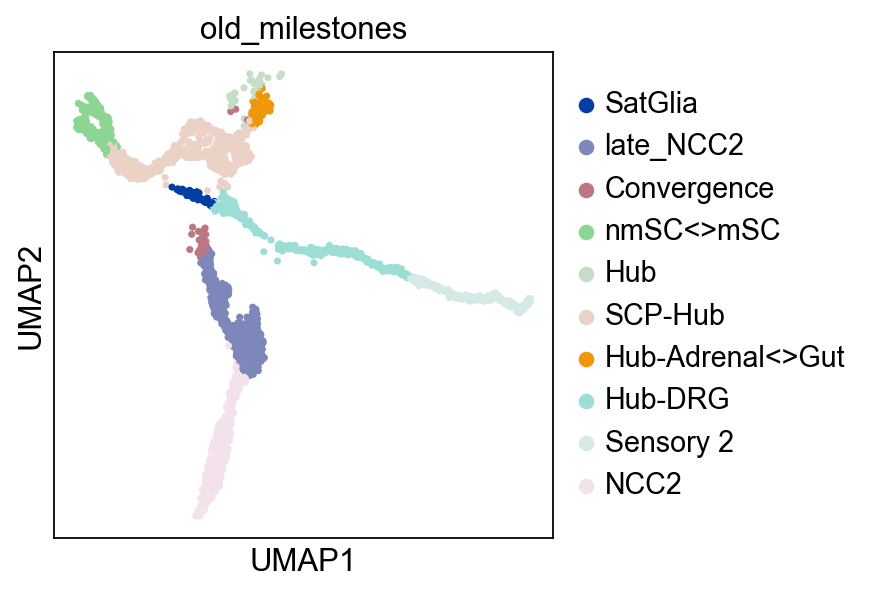

In [13]:
sc.pl.umap(adata,color="old_milestones")

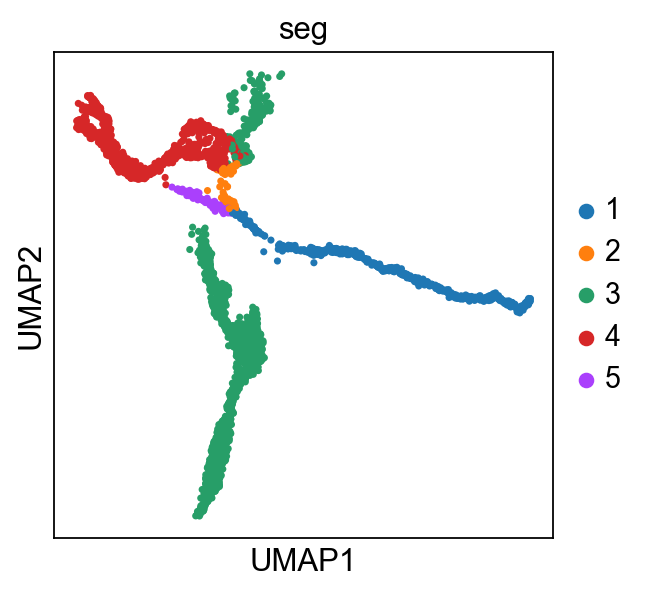

In [14]:
sc.pl.umap(adata,color="seg")

In [15]:
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]
    finished (0:00:03) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


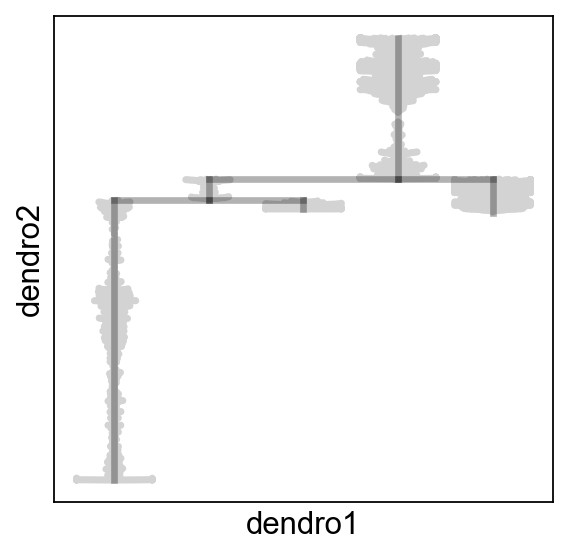

In [16]:
scf.pl.dendrogram(adata)

In [17]:
max_t=adata[adata.obs.seg.isin(["4","5"])].obs.t.max()

In [18]:
adata=adata[adata.obs.t<max_t]

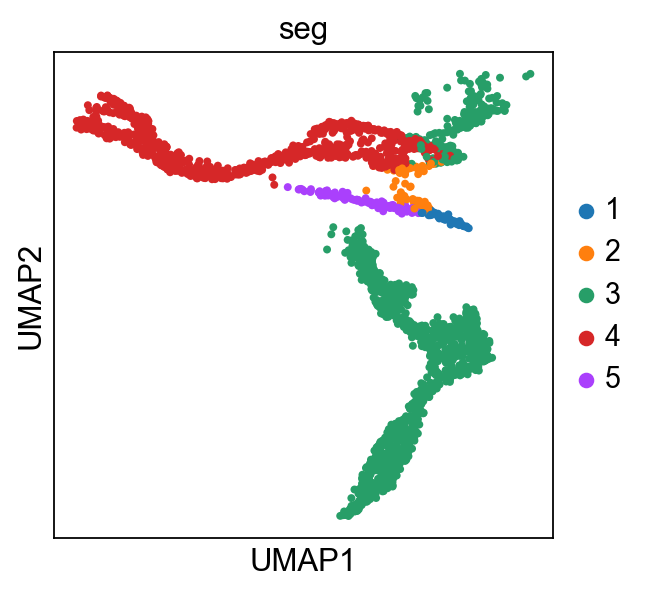

In [19]:
sc.pl.umap(adata,color="seg")

In [20]:
newroot=np.argwhere(adata.uns["graph"]["pp_info"].loc[adata.uns["graph"]["pp_info"].time<max_t].index==410)[0][0]
adata.obsm["X_R"]=adata.obsm["X_R"][:,adata.uns["graph"]["pp_info"].time<max_t]
adata.uns["graph"]["B"]=adata.uns["graph"]["B"][adata.uns["graph"]["pp_info"].time<max_t,:][:,adata.uns["graph"]["pp_info"].time<max_t]
adata.uns["graph"]["F"]=adata.uns["graph"]["F"][:,adata.uns["graph"]["pp_info"].time<max_t]

In [21]:
scf.tl.root(adata,newroot)

node 289 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [22]:
scf.tl.pseudotime(adata)

projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [23]:
scf.tl.extend_tips(adata,restrict_seg=True)

Trying to set attribute `.obsm` of view, copying.


extending tree


Trying to set attribute `.obsm` of view, copying.


    finished (0:00:01) --> tips extended


In [24]:
scf.tl.cleanup(adata,minbranchlength=10)

    graph cleaned --> removed 1 principal points


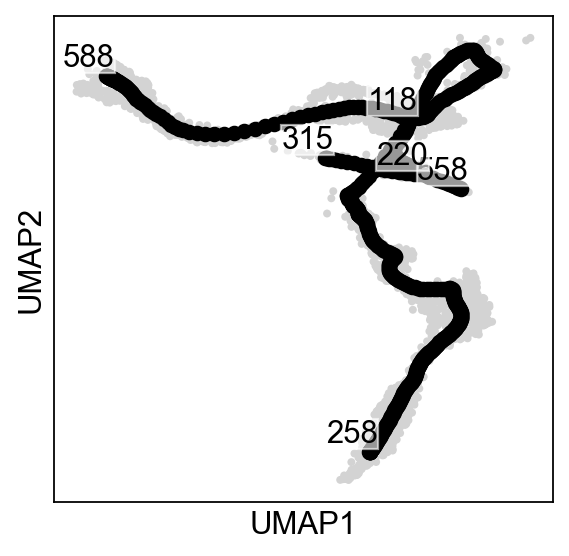

In [25]:
scf.pl.graph(adata)

In [26]:
scf.tl.root(adata,258)
scf.tl.pseudotime(adata)

node 258 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [27]:
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]
    finished (0:00:01) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


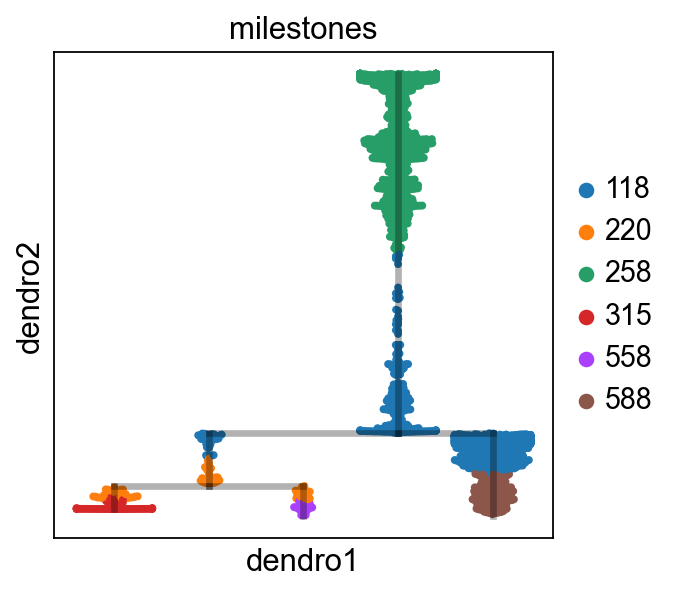

In [28]:
scf.pl.dendrogram(adata,color="milestones")

In [29]:
adata.uns["graph"]["tips"].astype(str)

array(['258', '315', '558', '588'], dtype='<U21')

In [30]:
import pandas as pd
assign=dict(zip(adata.uns["graph"]["tips"].astype(str),
         ["NCC","SatGlia","Sensory 2","imSC"]))

assign=pd.Series(assign)

ordered=adata.uns["graph"]["pp_info"].loc[adata.uns["graph"]["forks"]].sort_values("time").index.astype(str)

import string
ordered=pd.Series([string.ascii_uppercase[i] for i in range(len(ordered))],
          index=ordered)

newmil=pd.concat([assign,ordered]).loc[adata.obs.milestones.cat.categories].tolist()

scf.tl.rename_milestones(adata,newmil)

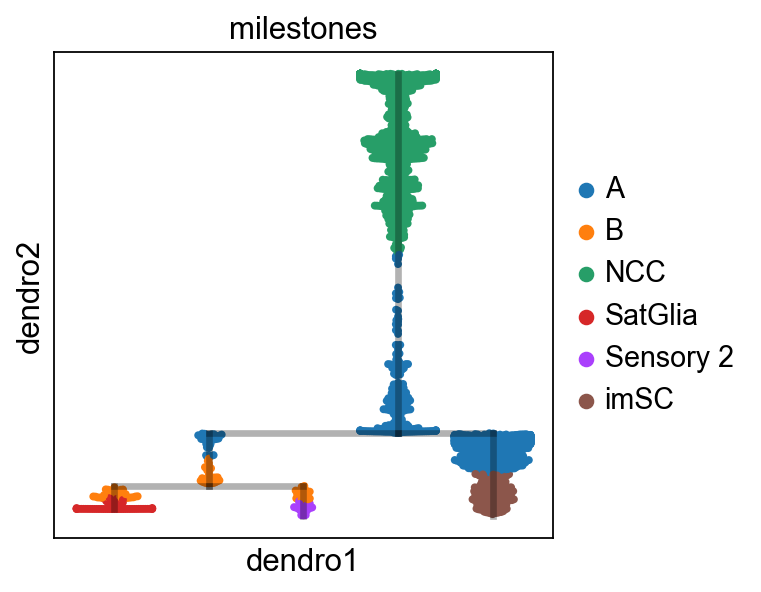

In [31]:
scf.pl.dendrogram(adata,color="milestones")

In [32]:
scf.tl.test_association(adata,n_jobs=20,A_cut=0.015)

test features for association with the trajectory
    single mapping : 100%|██████████| 600/600 [00:22<00:00, 26.33it/s]
    found 270 significant features (0:00:22) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [33]:
del adata.uns["graph"]["root2"]

In [34]:
scf.tl.fit(adata,n_jobs=20,gamma=5)

fit features associated with the trajectory
    single mapping : 100%|██████████| 270/270 [00:09<00:00, 27.22it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:10) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


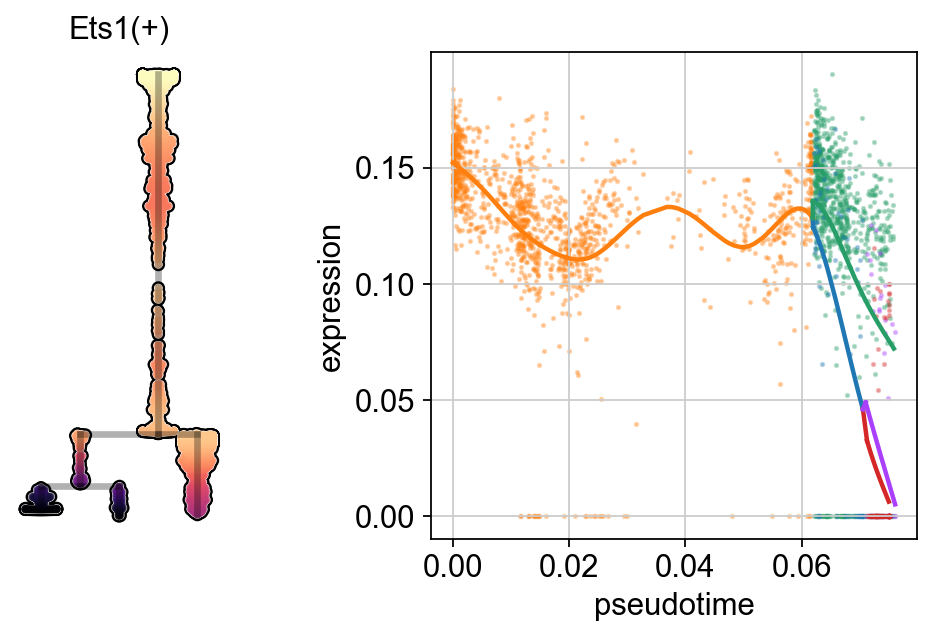

In [35]:
sc.set_figure_params(figsize=(1,3))
scf.pl.single_trend(adata,"Ets1(+)",basis="dendro",cmap_cells="magma",
                    frameon=False,add_outline=True)

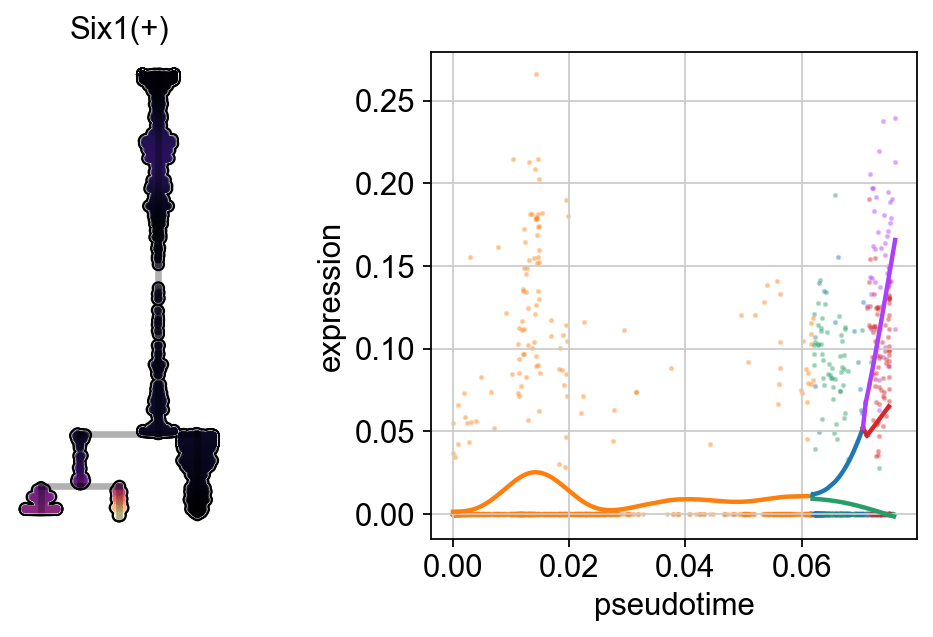

In [36]:
scf.pl.single_trend(adata,"Six1(+)",basis="dendro",cmap_cells="magma",
                    frameon=False,add_outline=True)

In [37]:
#scf.pl.trends(adata,plot_emb=False,show_milsetones=False,colormap="magma",filter_complex=False,ordering="max",ord_thre=0.9)

In [38]:
scf.tl.subset_tree(adata,root_milestone="NCC",milestones=["imSC"])

subsetting tree
node 225 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [39]:
adata=adata.raw.to_adata()

In [40]:
scf.tl.pseudotime(adata,n_map=100,n_jobs=80)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:35<00:00,  2.78it/s]
    finished (0:00:36) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [41]:
scf.tl.test_association(adata,n_jobs=80,n_map=100,A_cut=0.02)

test features for association with the trajectory
    multi mapping : 100%|██████████| 100/100 [08:53<00:00,  5.33s/it] 
    found 203 significant features (0:08:53) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [42]:
scf.tl.fit(adata,n_jobs=20)

fit features associated with the trajectory
    single mapping : 100%|██████████| 203/203 [00:23<00:00,  8.48it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:24) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [43]:
scf.tl.cluster(adata,knn=40,device="gpu",metric="cosine")

    clustering using grapheno
Finding 40 nearest neighbors using cosine metric and brute algorithm...
Neighbors computed in 3.567453384399414 seconds...
Computing Jaccard similarity...
jaccard graph constructed in 0.1126868724822998 seconds...
Running Louvain modularity optimization...
grapheno completed in 4.000489234924316 seconds...
Communities detected: 5
Modularity: 0.5007805824279785
    finished (0:00:10) --> added
    .obsp['similarity'], pairwise similarity graph.
    .var['fit_clusters'], cluster assignments for features.
    .uns['fit_clusters'], parameters and modularity of the clustering.


In [44]:
adata_tree=sc.read("data/adata_tree.h5ad")[adata.obs_names]

In [45]:
adata.obs["old_milestones"]=adata_tree.obs["milestones"]

In [46]:
adata.write("data/adata_SCtraj_scenic.h5ad")